In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [2]:
'''
Importing the text file which contains the chat of the group
in read mode using utf-8 encoding!
This is my clg group chat,it contains chats from 2018,so its a very big
file,will preview it after we've done adding regular expressions!

'''

f = open('WhatsApp Chat.txt','r',encoding='utf-8')

data = f.read()



In [3]:
dummy = data.split('\n')
dummy

['02/11/2020, 00:38 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '07/02/2021, 20:37 - Kalp Narayan Tiwari: <Media omitted>',
 '07/02/2021, 20:37 - Kalp Narayan Tiwari: <Media omitted>',
 '07/02/2021, 20:37 - Kalp Narayan Tiwari: <Media omitted>',
 '07/02/2021, 20:37 - Kalp Narayan Tiwari: <Media omitted>',
 '07/02/2021, 20:37 - Kalp Narayan Tiwari: <Media omitted>',
 '07/02/2021, 20:37 - Kalp Narayan Tiwari: <Media omitted>',
 '07/02/2021, 20:37 - Kalp Narayan Tiwari: <Media omitted>',
 '07/02/2021, 20:37 - Chhotkawan Tiwari SAF: <Media omitted>',
 '08/02/2021, 07:29 - Sandeep Tiwari Aacharya: *मोदी कौन है ?*',
 'इसका जवाब एक जानकार राजनैतिक वैद्य ने बड़ा सुंदर समझाया।',
 'आयुर्वेद और मेडिकल सांईस में *शहद* को अमृत के समान माना गया हैं।',
 'लेकिन आश्चर्य इस बात का है कि शहद को अगर *कुत्ता* चाट ले तो वह मर जाता हैं। ',
 'यानी जो मनुष्यों के लिये अमृत हैं वह शहद कुत्तों के लिये जहर है।',
 

In [4]:
'''
Example for dry run : '16/08/18, 20:09 - '

\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s

the first part "d{1,2}" this means here we can have one or 2 digits
then after we have "/"
then after we have "d{1,2}" again,same we can have one or 2 digits
then after we have "/"
then after we have "d{2,4}" here we check for 2 or more digits
then we have a space represented as "\s"
then we have hour representation it can take either one or 2 digits 
then we have a seperator ":" 
and the pattern repeats so on..

'''

# username and message in different col

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern,data)[1:]
print(len(messages))

## extracting dates as well in different col

dates = re.findall(pattern,data)
print(len(dates))

7471
7471


In [5]:
# this is a simple time string,we will appply this kind of transformation
# inorder to get the date and the time for our analysis

string = '16/08/18, 20:09 - '
string = string.split(',')
date,time = string[0],string[1]
time = time.split('-')
time = time[0].strip()
print(date+" and "+time)

16/08/18 and 20:09


In [6]:
# this function is to seperate the time and date

def gettimeanddate(string):
    string = string.split(',')
    date,time = string[0],string[1]
    time = time.split('-')
    time = time[0].strip()
    
    return date+" "+time




In [7]:
# creating a dataframe for messages and their dates

df = pd.DataFrame({'user_messages':messages,
                   'message_date':dates})

df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,02/11/2020 00:38
1,Kalp Narayan Tiwari: <Media omitted>\n,07/02/2021 20:37
2,Kalp Narayan Tiwari: <Media omitted>\n,07/02/2021 20:37
3,Kalp Narayan Tiwari: <Media omitted>\n,07/02/2021 20:37
4,Kalp Narayan Tiwari: <Media omitted>\n,07/02/2021 20:37


In [8]:
df['user_messages']

0       Messages and calls are end-to-end encrypted. N...
1                  Kalp Narayan Tiwari: <Media omitted>\n
2                  Kalp Narayan Tiwari: <Media omitted>\n
3                  Kalp Narayan Tiwari: <Media omitted>\n
4                  Kalp Narayan Tiwari: <Media omitted>\n
                              ...                        
7466           Deepak Tiwari Allahabad: <Media omitted>\n
7467    Pandit Ankit Tiwari: *आप सभी मित्रों को दीपावल...
7468                Natthu Bhai Tiwari: <Media omitted>\n
7469    Your security code with Life For Other changed...
7470    Kulli: https://www.youtube.com/@kullitiwari187...
Name: user_messages, Length: 7471, dtype: object

In [ ]:

users = []
messages = []

for message in df['user_messages']:
    
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

        
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
        
df['User'] = users
df['message'] = messages


def getstring(text):
    return text.split('\n')[0]

df['message'] = df['message'].apply(lambda text:getstring(text))


df = df.drop(['user_messages'],axis=1)
df = df[['message','date','User']]

df = df.rename(columns={'message':'Message',
                       'date':'Date'})



df.head()

,Message,Date,User
0,Messages and calls are end-to-end encrypted. N...,02/11/2020 00:38,Group Notification
1,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari
2,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari
3,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari
4,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari


In [10]:
# 16/08/18 20:09
    
# YYYY-MM-DD

In [11]:
df.shape

(7471, 3)

In [12]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()


df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute


df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,02/11/2020 00:38,Group Notification,2020-02-11,2020,2,February,11,Tuesday,0,38
1,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
2,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
3,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
4,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37


In [13]:
df[df['User'] == 'Jagss']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute


In [14]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

54375


In [15]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '*मोदी',
 'कौन',
 'है',
 '?*',
 'आस्तीन',
 'के',
 'साँपो',
 'का',
 'पाला',
 'अबकी',
 'बार',
 'नरेंद्र',
 'मोदी',
 'जैसे',
 'बाज',
 'से',
 'पड़ा',
 'है.....',
 'This',
 'message',
 'was',
 'deleted',
 'महाराजा',
 'भर्तृहरि',
 'से',
 'गुरु',
 'गोपीनाथ',
 'ने',
 'कहा',
 'था:-',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'जय',
 'जय',
 'श्री',
 'राम',
 '<Media',
 'omitted>',
 'https://m.facebook.com/story.php?story_fbid=2031255430348450&id=109801760790511&sfnsn=wiwspwa&d=w&vh=e&funlid=UYLvBxzwJO3m0jtQ',
 '<Media',

In [16]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Jagss')].shape

(0, 11)

In [17]:
df['Message'].unique()

array(['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
       '<Media omitted>', '*मोदी कौन है ?*', ...,
       'https://www.facebook.com/share/p/f6zezNKQVeCnjaLK/',
       '*आप सभी मित्रों को दीपावली की हार्दिक शुभकामनाएं बधाई*',
       'https://www.youtube.com/@kullitiwari1873'], dtype=object)

In [18]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
1,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
2,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
3,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
4,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
5,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
...,...,...,...,...,...,...,...,...,...,...,...
7462,<Media omitted>,30/10/2024 07:55,Budai Tiwari,2024-10-30,2024,10,October,30,Wednesday,7,55
7463,<Media omitted>,31/10/2024 10:34,Shinkku,2024-10-31,2024,10,October,31,Thursday,10,34
7464,<Media omitted>,31/10/2024 10:41,Kulli,2024-10-31,2024,10,October,31,Thursday,10,41
7466,<Media omitted>,31/10/2024 11:39,Deepak Tiwari Allahabad,2024-10-31,2024,10,October,31,Thursday,11,39


In [19]:
df['User'].value_counts().head()

Siddhanath              780
Pankaj Tiwari Panjab    407
Kulli                   401
Pandit Ankit Tiwari     390
Group Notification      370
Name: User, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

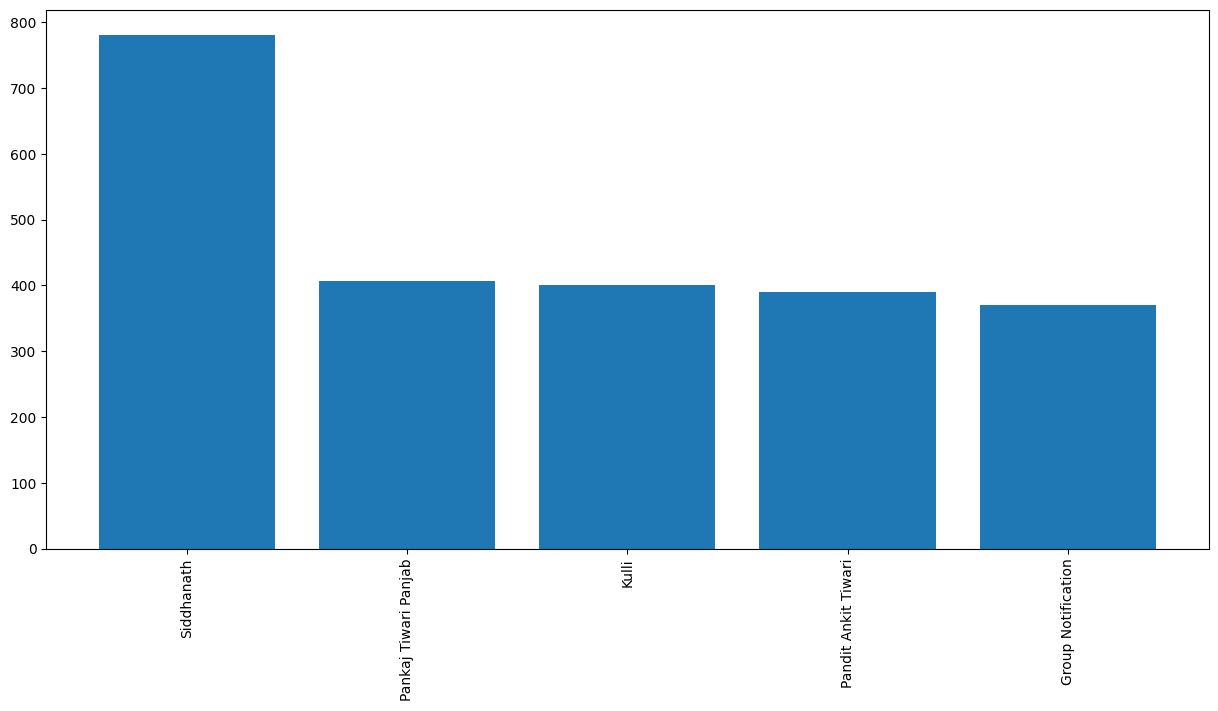

In [20]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')


In [21]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
            
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'<Media': 2555,
 'omitted>': 2555,
 'है': 1015,
 'के': 927,
 'की': 694,
 'में': 669,
 'का': 630,
 'को': 561,
 'से': 532,
 'और': 477,
 'तो': 366,
 'to': 362,
 'हो': 362,
 'Tiwari': 308,
 'हैं': 295,
 'नहीं': 288,
 'जी': 276,
 'भी': 274,
 'Tap': 248,
 'message': 247,
 'with': 239,
 'code': 238,
 'learn': 237,
 'more.': 237,
 'ही': 236,
 'Your': 236,
 'security': 236,
 'changed.': 236,
 'deleted': 235,
 'बहुत': 222,
 'पर': 220,
 'was': 206,
 'लिए': 206,
 'This': 205,
 'कि': 201,
 'भाई': 194,
 'एक': 191,
 'hai': 161,
 'कर': 160,
 'आप': 158,
 'क्या': 152,
 'सभी': 148,
 'जो': 147,
 'जय': 145,
 'गांव': 131,
 'रहा': 131,
 'कुछ': 129,
 'रहे': 127,
 'ho': 124,
 'अपने': 122,
 'कोई': 121,
 '||': 119,
 'इस': 118,
 '🙏': 117,
 'ने': 115,
 'नही': 114,
 'बात': 111,
 'श्री': 110,
 'साथ': 107,
 'आज': 106,
 'he': 104,
 'Hanna': 101,
 'गया': 96,
 'तिवारी': 94,
 'ये': 93,
 'ka': 92,
 'ki': 91,
 'यह': 91,
 'किसी': 89,
 'बाबा': 87,
 'प्रधान': 86,
 'मैं': 86,
 'अब': 85,
 'left': 84,
 'हुआ': 81,
 'या': 81,
 'k

In [22]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,<Media,2555
1,omitted>,2555
2,है,1015
3,के,927
4,की,694
5,में,669
6,का,630
7,को,561
8,से,532
9,और,477


In [ ]:
# a,an,the,you,ok,...

NameError: name 'a' is not defined

In [24]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,02/11/2020 00:38,Group Notification,2020-02-11,2020,2,February,11,Tuesday,0,38
1,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
2,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
3,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
4,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
...,...,...,...,...,...,...,...,...,...,...,...
7466,<Media omitted>,31/10/2024 11:39,Deepak Tiwari Allahabad,2024-10-31,2024,10,October,31,Thursday,11,39
7467,*आप सभी मित्रों को दीपावली की हार्दिक शुभकामना...,31/10/2024 11:42,Pandit Ankit Tiwari,2024-10-31,2024,10,October,31,Thursday,11,42
7468,<Media omitted>,31/10/2024 15:01,Natthu Bhai Tiwari,2024-10-31,2024,10,October,31,Thursday,15,1
7469,Your security code with Life For Other changed...,08/11/2024 13:09,Group Notification,2024-08-11,2024,8,August,11,Sunday,13,9


In [25]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon


,0,1
0,<media,2555
1,omitted>,2555
2,है,1015
3,के,927
4,की,694
5,में,669
6,का,630
7,को,561
8,से,532
9,और,477


In [26]:
import emoji

In [27]:
def emojihelp(selecteduser,df):
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
        
    
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    return emojidf


dfmoji = emojihelp('Overall',df)
dfmoji

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [28]:
dfmoji.columns = ['Emoji','Count']
dfmoji

NameError: name 'dfmoji' is not defined

In [29]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,02/11/2020 00:38,Group Notification,2020-02-11,2020,2,February,11,Tuesday,0,38
1,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
2,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
3,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
4,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37


In [30]:
'''
We want the count of messages month-wise,
so we will apply group by and then by 
adding reset_index() we will get the 
result in a dataframe format

then we will add the "Year and month columns" 
like "January-2018",so that to analyze the things become simple

'''


def monthtimeline(selecteduser,df):


    temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index().sort_values(['Message'])
    
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
        
    temp['Time'] = time
    
    return temp

In [31]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,02/11/2020 00:38,Group Notification,2020-02-11,2020,2,February,11,Tuesday,0,38
1,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
2,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
3,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
4,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37


In [32]:
1,2,2,3,4,4,4,5,6,7,3,4


1| 2 2 | 3 3| 4 4 4 4 | 5 | 6 | 7

{4 : 4, 3:2 , 2:2,} 

SyntaxError: invalid syntax (775312252.py, line 4)

In [33]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2020,2,February,1
1,2021,1,January,263
2,2021,2,February,335
3,2021,3,March,588
4,2021,4,April,496
5,2021,5,May,531
6,2021,6,June,461
7,2021,7,July,290
8,2021,8,August,344
9,2021,9,September,358


In [34]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2020,2,February,1
1,2021,1,January,263
2,2021,2,February,335
3,2021,3,March,588
4,2021,4,April,496
5,2021,5,May,531
6,2021,6,June,461
7,2021,7,July,290
8,2021,8,August,344
9,2021,9,September,358


In [35]:
temp.shape

(49, 4)

In [36]:
str(temp['Month'][0])+"-"+str(temp['Year'][0])

'February-2020'

In [37]:
time = []
for i in range(temp.shape[0]):
    time.append(temp['Month'][i]+ "-" +str(temp['Year'][i]))
    
temp['Time'] = time

temp

,Year,Month_num,Month,Message,Time
0,2020,2,February,1,February-2020
1,2021,1,January,263,January-2021
2,2021,2,February,335,February-2021
3,2021,3,March,588,March-2021
4,2021,4,April,496,April-2021
5,2021,5,May,531,May-2021
6,2021,6,June,461,June-2021
7,2021,7,July,290,July-2021
8,2021,8,August,344,August-2021
9,2021,9,September,358,September-2021


In [38]:
temp

,Year,Month_num,Month,Message,Time
0,2020,2,February,1,February-2020
1,2021,1,January,263,January-2021
2,2021,2,February,335,February-2021
3,2021,3,March,588,March-2021
4,2021,4,April,496,April-2021
5,2021,5,May,531,May-2021
6,2021,6,June,461,June-2021
7,2021,7,July,290,July-2021
8,2021,8,August,344,August-2021
9,2021,9,September,358,September-2021


In [39]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,02/11/2020 00:38,Group Notification,2020-02-11,2020,2,February,11,Tuesday,0,38
1,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
2,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
3,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37
4,<Media omitted>,07/02/2021 20:37,Kalp Narayan Tiwari,2021-07-02,2021,7,July,2,Friday,20,37


In [40]:
temp1 = df['Day_name'].value_counts()

In [41]:
temp1

Tuesday      1195
Saturday     1120
Monday       1088
Thursday     1080
Friday       1059
Sunday       1014
Wednesday     915
Name: Day_name, dtype: int64

In [42]:
list(temp1.index)

['Tuesday', 'Saturday', 'Monday', 'Thursday', 'Friday', 'Sunday', 'Wednesday']

In [43]:
list(temp1.values)

[1195, 1120, 1088, 1080, 1059, 1014, 915]

In [44]:
temp2 = df['Month'].value_counts()

In [45]:
temp2

March        889
May          724
April        675
June         674
September    674
October      646
August       591
December     564
February     537
January      531
November     493
July         473
Name: Month, dtype: int64

In [46]:
list(temp2.index),list(temp2.values)

(['March',
  'May',
  'April',
  'June',
  'September',
  'October',
  'August',
  'December',
  'February',
  'January',
  'November',
  'July'],
 [889, 724, 675, 674, 674, 646, 591, 564, 537, 531, 493, 473])